<a href="https://colab.research.google.com/github/utkarshk30/NLP-Project-Round---1/blob/main/NLP_Project_Round_1_%26_Round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Processing for the book Software-Engineering-9th-Edition-by-Ian-Sommerville

#### Importing Libraries

In [2]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

####  Reading book and converting it into a text variable

In [6]:
file = open(r"book.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [7]:
type(file)

_io.TextIOWrapper

In [8]:
text[:10000] #all characters of the book are taken

'2                      SOFTWARE                   ENGINEERING                      Ninth       Edition                      Ian       Sommerville                                               Addison-Wesley         Boston Columbus Indianapolis New York San Francisco Upper Saddle RiverAmsterdam Cape Town Dubai London Madrid Milan Munich Paris Montreal Toronto    Delhi Mexico City São Paulo Sydney Hong Kong Seoul Singapore Taipei Tokyo3Editorial  Director:  Marcia  HortonEditor in  Chief:  Michael  HirschAcquisitions  Editor:  Matt  GoldsteinEditorial  Assistant:  Chelsea BellManaging Editor:  Jeff  HolcombSenior Production  Project Manager:  Marilyn  LloydDirector  of Marketing:   Margaret WaplesMarketing  Coordinator:  Kathryn  FerrantiSenior Manufacturing  Buyer:  Carol  MelvilleText Designer: Susan RaymondCover Art  Director:  Elena SidorovaFront Cover Photograph:  © Jacques Pavlovsky/Sygma/CorbisInterior  Chapter Opener: © graficart.net/AlamyFull-Service  Project Management:  Andre

In [9]:
len(text)

2997647

### Preprocessing

In [10]:
# Removing all the punctuations
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
#Converting the text into lower case         
cleantext = cleantext.lower()

cleantext[:]  #after removing the punctuations

#### Visualization

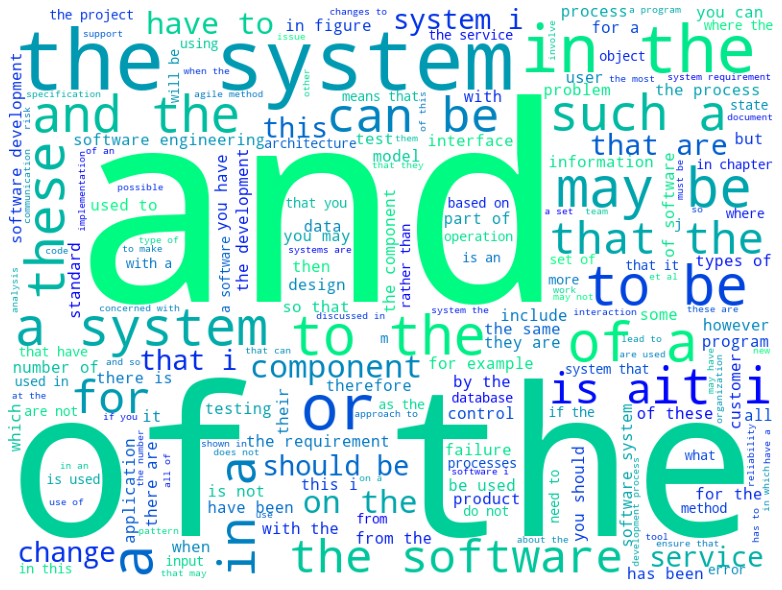

In [11]:
# Word cloud without removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


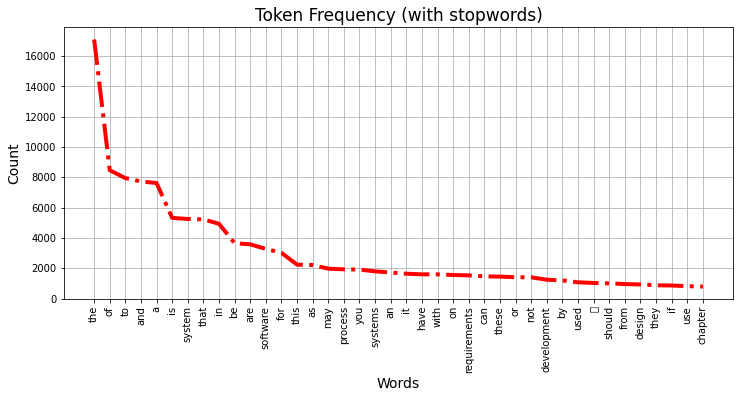

In [12]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [13]:
tokens = word_tokenize(cleantext)
tokens[:]  

['2',
 'software',
 'engineering',
 'ninth',
 'edition',
 'ian',
 'sommerville',
 'addisonwesley',
 'boston',
 'columbus',
 'indianapolis',
 'new',
 'york',
 'san',
 'francisco',
 'upper',
 'saddle',
 'riveramsterdam',
 'cape',
 'town',
 'dubai',
 'london',
 'madrid',
 'milan',
 'munich',
 'paris',
 'montreal',
 'toronto',
 'delhi',
 'mexico',
 'city',
 'são',
 'paulo',
 'sydney',
 'hong',
 'kong',
 'seoul',
 'singapore',
 'taipei',
 'tokyo3editorial',
 'director',
 'marcia',
 'hortoneditor',
 'in',
 'chief',
 'michael',
 'hirschacquisitions',
 'editor',
 'matt',
 'goldsteineditorial',
 'assistant',
 'chelsea',
 'bellmanaging',
 'editor',
 'jeff',
 'holcombsenior',
 'production',
 'project',
 'manager',
 'marilyn',
 'lloyddirector',
 'of',
 'marketing',
 'margaret',
 'waplesmarketing',
 'coordinator',
 'kathryn',
 'ferrantisenior',
 'manufacturing',
 'buyer',
 'carol',
 'melvilletext',
 'designer',
 'susan',
 'raymondcover',
 'art',
 'director',
 'elena',
 'sidorovafront',
 'cover',
 '

In [14]:
type(tokens)

list

In [15]:
len(tokens)

300233

#### Removing stopwords and tokenization

In [16]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

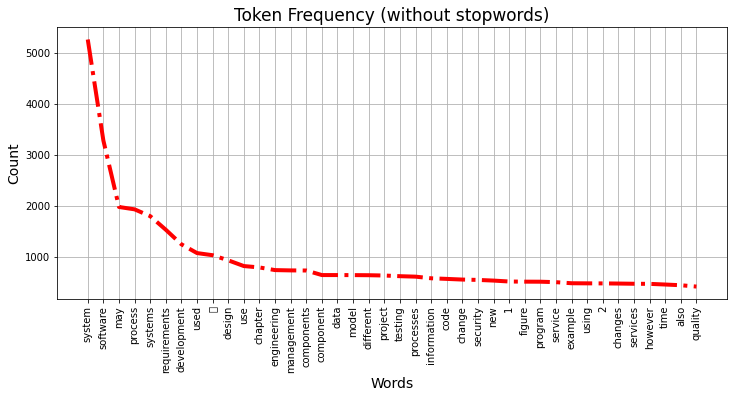

In [17]:
tokens = word_tokenize(finaltext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [18]:
finaltext[:]

'2  software  engineering  ninth  edition  ian  sommerville  addisonwesley  boston  columbus  indianapolis  new  york  san  francisco  upper  saddle  riveramsterdam  cape  town  dubai  london  madrid  milan  munich  paris  montreal  toronto  delhi  mexico  city  são  paulo  sydney  hong  kong  seoul  singapore  taipei  tokyo3editorial  director  marcia  hortoneditor  chief  michael  hirschacquisitions  editor  matt  goldsteineditorial  assistant  chelsea  bellmanaging  editor  jeff  holcombsenior  production  project  manager  marilyn  lloyddirector  marketing  margaret  waplesmarketing  coordinator  kathryn  ferrantisenior  manufacturing  buyer  carol  melvilletext  designer  susan  raymondcover  art  director  elena  sidorovafront  cover  photograph  ©  jacques  pavlovskysygmacorbisinterior  chapter  opener  ©  graficartnetalamyfullservice  project  management  andrea  stefanowicz  ggs  higher  education  resources  division  premedia  global  inccomposition  illustrations  ggs  high

#### Visualization

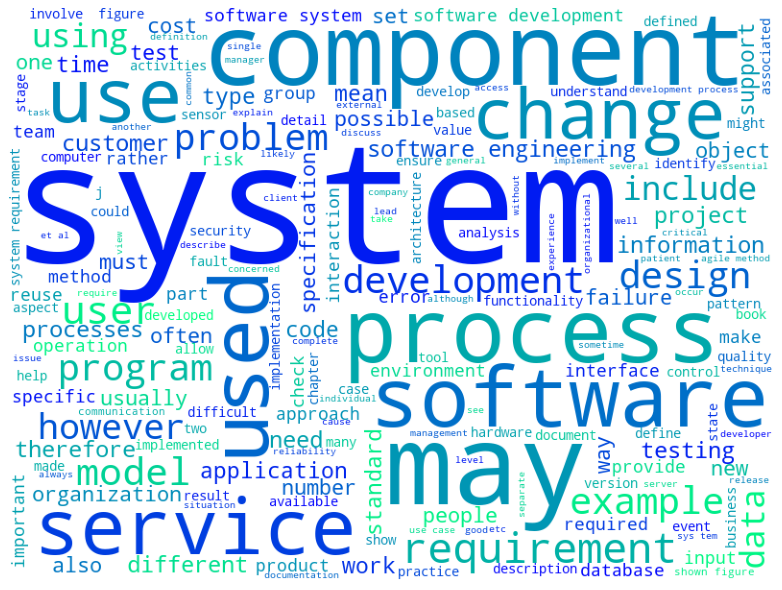

In [19]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### Frequency distribution of tokens

#### PoS Tagging and Frequency Distribution of Tags on Text

In [20]:
tagged = nltk.pos_tag(tokens) 
tagged[:] # pos tagging

[('2', 'CD'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('ninth', 'JJ'),
 ('edition', 'NN'),
 ('ian', 'JJ'),
 ('sommerville', 'NN'),
 ('addisonwesley', 'IN'),
 ('boston', 'NN'),
 ('columbus', 'NN'),
 ('indianapolis', 'VBP'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('san', 'JJ'),
 ('francisco', 'JJ'),
 ('upper', 'JJ'),
 ('saddle', 'NN'),
 ('riveramsterdam', 'NN'),
 ('cape', 'NN'),
 ('town', 'NN'),
 ('dubai', 'JJ'),
 ('london', 'NN'),
 ('madrid', 'JJ'),
 ('milan', 'NN'),
 ('munich', 'JJ'),
 ('paris', 'NN'),
 ('montreal', 'NN'),
 ('toronto', 'IN'),
 ('delhi', 'JJ'),
 ('mexico', 'FW'),
 ('city', 'NN'),
 ('são', 'NN'),
 ('paulo', 'JJ'),
 ('sydney', 'NN'),
 ('hong', 'NN'),
 ('kong', 'NN'),
 ('seoul', 'NN'),
 ('singapore', 'RB'),
 ('taipei', 'JJ'),
 ('tokyo3editorial', 'JJ'),
 ('director', 'NN'),
 ('marcia', 'NN'),
 ('hortoneditor', 'NN'),
 ('chief', 'NN'),
 ('michael', 'NN'),
 ('hirschacquisitions', 'NNS'),
 ('editor', 'NN'),
 ('matt', 'VBP'),
 ('goldsteineditorial', 'JJ'),
 ('assistant', 'NN'

In [21]:
type(tagged)

list

In [22]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 67669, 'JJ': 26196, 'NNS': 25756, 'CD': 11998, 'VBP': 7914, 'RB': 6978, 'VBG': 6418, 'VBN': 5898, 'VBD': 5723, 'VBZ': 4174, 'VB': 4034, 'MD': 2927, 'IN': 1363, 'NNP': 510, 'JJR': 398, 'RBR': 218, 'DT': 208, 'JJS': 177, 'FW': 169, 'CC': 110, 'PRP': 61, 'RP': 55, '$': 35, 'WP$': 30, 'WRB': 23, 'WDT': 21, 'RBS': 15, 'WP': 14, 'POS': 9, 'PRP$': 3, 'SYM': 1, 'NNPS': 1})


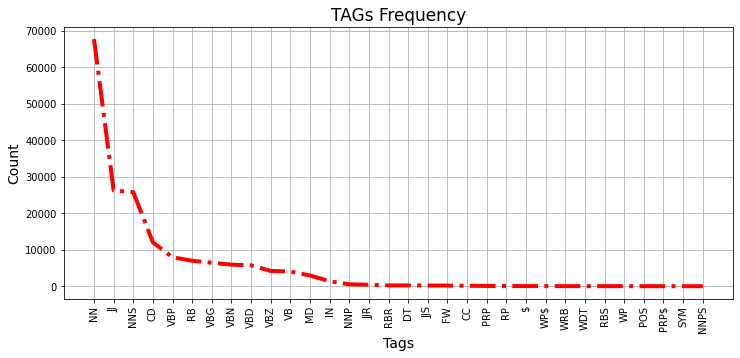

In [23]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('TAGs Frequency',size=17)
plt.xlabel('Tags',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### For word length vs Frequency distribution

In [24]:
import numpy as np
bin_size=np.linspace(0,16)

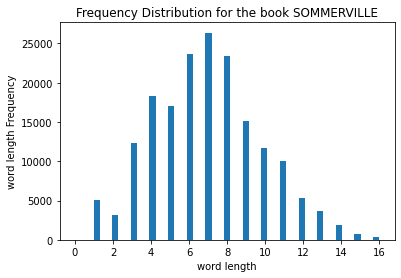

In [25]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book SOMMERVILLE')
plt.show()


PART 1: Finding Nouns and verbs in the Book and
categorising using the WordNet.

In [26]:
nouns_T1=[]
for i in tagged:
  if(i[1][0] == 'N'):
    nouns_T1.append(i[0])

In [27]:
nouns_T1[:]

['software',
 'engineering',
 'edition',
 'sommerville',
 'boston',
 'columbus',
 'york',
 'saddle',
 'riveramsterdam',
 'cape',
 'town',
 'london',
 'milan',
 'paris',
 'montreal',
 'city',
 'são',
 'sydney',
 'hong',
 'kong',
 'seoul',
 'director',
 'marcia',
 'hortoneditor',
 'chief',
 'michael',
 'hirschacquisitions',
 'editor',
 'assistant',
 'chelsea',
 'editor',
 'jeff',
 'production',
 'project',
 'manager',
 'marilyn',
 'lloyddirector',
 'marketing',
 'margaret',
 'coordinator',
 'buyer',
 'carol',
 'designer',
 'director',
 'sidorovafront',
 'cover',
 'photograph',
 '©',
 'chapter',
 'opener',
 '©',
 'graficartnetalamyfullservice',
 'project',
 'management',
 'stefanowicz',
 'ggs',
 'education',
 'resources',
 'division',
 'premedia',
 'inccomposition',
 'illustrations',
 'education',
 'resources',
 'division',
 'premedia',
 'incprinterbinder',
 'edwards',
 'colorhagerstowncopyright',
 '©',
 'pearson',
 'education',
 'inc',
 'allrights',
 'states',
 'publication',
 'copyright

In [28]:
print(len(nouns_T1))

93936


In [29]:
verb_T1=[]
for i in tagged:
  if(i[1][0] == 'V'):
    verb_T1.append(i[0])

In [30]:
verb_T1[:]

['indianapolis',
 'matt',
 'bellmanaging',
 'waplesmarketing',
 'manufacturing',
 'susan',
 'jacques',
 'ggs',
 'printer',
 'publishing',
 'reserved',
 'manufactured',
 'america',
 'protected',
 'obtained',
 'prohibited',
 'means',
 'photocopyingrecording',
 'obtain',
 'use',
 'submit',
 'seller',
 'claimed',
 'appear',
 'printed',
 '—',
 'includes',
 'writing',
 'wasproposed',
 'needed',
 'cost',
 'expected',
 'wrote',
 'started',
 'function',
 'infrastructure—energy',
 'transport—all',
 'reliablecomputer',
 'allowed',
 'explore',
 'faced',
 'declining',
 'increasing',
 'andhoused',
 'help',
 'lead',
 'fulfilled',
 'need',
 'help',
 'address',
 'continue',
 'develop',
 'stillproblems',
 'morethan',
 'expected',
 'let',
 'conceal',
 'developed',
 'processes',
 'increased',
 'reuse',
 'believe',
 'place',
 'combine',
 'build',
 'reflect',
 'read',
 'disagree',
 'discipline',
 'engi',
 'find',
 'questioned',
 'needed',
 'presented',
 'find',
 'need',
 'believe',
 'learning',
 'serve',
 '

In [71]:
print("There are Total "+str(len(nouns_T1))+ " Nouns and " +str(len(verb_T1))+" Verbs present in the book sommerville " )

There are Total 93936 Nouns and 34161 Verbs present in the book sommerville 


In [31]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [32]:
from nltk.corpus import wordnet 

In [33]:
nt1=[]

for i in nouns_T1:
  syn =  wordnet.synsets(i,pos=wordnet.NOUN)
  if len(syn)>0:
    nt1.append(syn[0].lexname())

print(list(zip(nouns_T1,nt1)))

[('software', 'noun.communication'), ('engineering', 'noun.act'), ('edition', 'noun.communication'), ('sommerville', 'noun.location'), ('boston', 'noun.location'), ('columbus', 'noun.group'), ('york', 'noun.artifact'), ('saddle', 'noun.object'), ('riveramsterdam', 'noun.location'), ('cape', 'noun.location'), ('town', 'noun.location'), ('london', 'noun.location'), ('milan', 'noun.location'), ('paris', 'noun.location'), ('montreal', 'noun.location'), ('city', 'noun.location'), ('são', 'noun.person'), ('sydney', 'noun.person'), ('hong', 'noun.person'), ('kong', 'noun.person'), ('seoul', 'noun.person'), ('director', 'noun.person'), ('marcia', 'noun.act'), ('hortoneditor', 'noun.act'), ('chief', 'noun.person'), ('michael', 'noun.act'), ('hirschacquisitions', 'noun.person'), ('editor', 'noun.person'), ('assistant', 'noun.communication'), ('chelsea', 'noun.person'), ('editor', 'noun.person'), ('jeff', 'noun.artifact'), ('production', 'noun.artifact'), ('project', 'noun.communication'), ('mana

In [34]:
vt1=[]

for i in verb_T1:
  syn =  wordnet.synsets(i,pos=wordnet.VERB)
  if len(syn)>0:
    vt1.append(syn[0].lexname())
#print(vt1)
print(list(zip(verb_T1,vt1)))

[('indianapolis', 'verb.creation'), ('matt', 'verb.creation'), ('bellmanaging', 'verb.possession'), ('waplesmarketing', 'verb.creation'), ('manufacturing', 'verb.competition'), ('susan', 'verb.possession'), ('jacques', 'verb.communication'), ('ggs', 'verb.communication'), ('printer', 'verb.possession'), ('publishing', 'verb.consumption'), ('reserved', 'verb.communication'), ('manufactured', 'verb.communication'), ('america', 'verb.perception'), ('protected', 'verb.creation'), ('obtained', 'verb.stative'), ('prohibited', 'verb.creation'), ('means', 'verb.stative'), ('photocopyingrecording', 'verb.stative'), ('obtain', 'verb.cognition'), ('use', 'verb.creation'), ('submit', 'verb.change'), ('seller', 'verb.contact'), ('claimed', 'verb.social'), ('appear', 'verb.cognition'), ('printed', 'verb.communication'), ('—', 'verb.change'), ('includes', 'verb.change'), ('writing', 'verb.social'), ('wasproposed', 'verb.motion'), ('needed', 'verb.creation'), ('cost', 'verb.stative'), ('expected', 've

In [35]:
import seaborn as sns

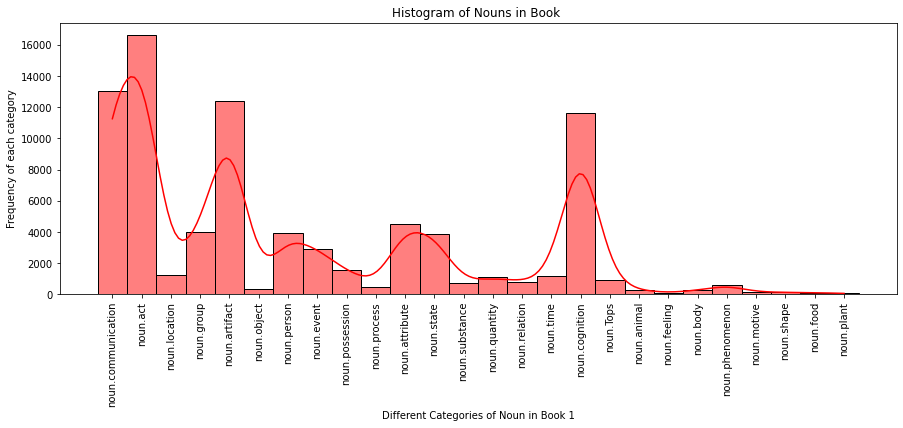

In [36]:
fig = plt.gcf()
fig.set_size_inches(15,5)
g = sns.histplot(x = nt1 , color = "red" , kde = True)
plt.setp(g.get_xticklabels() , rotation = 90)
plt.xlabel('Different Categories of Noun in Book 1')
plt.ylabel('Frequency of each category')
plt.title('Histogram of Nouns in Book ');

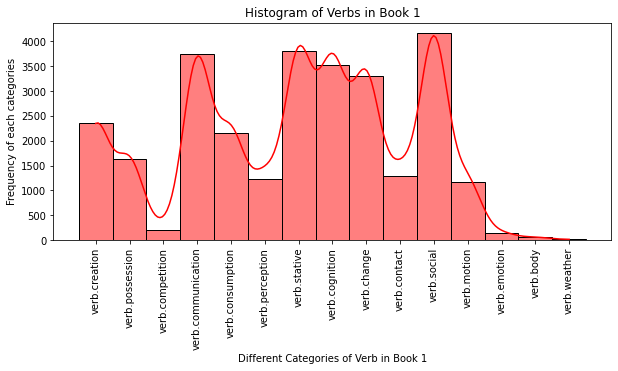

In [37]:
fig = plt.gcf() 
fig.set_size_inches(10,4)
g = sns.histplot(x = vt1 ,color = "red" , kde = True)
plt.setp(g.get_xticklabels() , rotation = 90)
plt.xlabel('Different Categories of Verb in Book 1')
plt.ylabel('Frequency of each categories')
plt.title('Histogram of Verbs in Book 1');

PART 2: Named Entity Recognition and Performance Measures

In [81]:
import spacy
ner = spacy.load('en_core_web_sm')



In [39]:
book1 = text[5000:1005000]
entity_tag_book1 = []
lst1 = ner(book1)
for word in lst1.ents:
  x = word.text
  y = word.label_
  entity_tag_book1.append([x,y])  

In [82]:
print("there are total "+str(len(lst1.ents))+" entities in the book")

there are total 3997 entities in the book


In [40]:
entity_tag_book1[:]

[['one', 'CARDINAL'],
 ['four', 'CARDINAL'],
 ['four', 'CARDINAL'],
 ['four', 'CARDINAL'],
 ['3', 'CARDINAL'],
 ['Support Materials', 'WORK_OF_ART'],
 ['Preface', 'GPE'],
 ['the                                          Ariane 5', 'LAW'],
 ['Software', 'ORG'],
 ['2', 'CARDINAL'],
 ['four', 'CARDINAL'],
 ['four', 'CARDINAL'],
 ['4', 'CARDINAL'],
 ['between                                          30% and 40%', 'PERCENT'],
 ['7', 'CARDINAL'],
 ['Reason’s Swiss Cheese                                          ', 'ORG'],
 ['three', 'CARDINAL'],
 ['first', 'ORDINAL'],
 ['one', 'CARDINAL'],
 ['2–4', 'DATE'],
 ['2', 'CARDINAL'],
 ['3', 'CARDINAL'],
 ['Chapters 16', 'DATE'],
 ['17', 'DATE'],
 ['18', 'DATE'],
 ['19', 'CARDINAL'],
 ['PowerPoint', 'ORG'],
 ['PowerPoint.8                                                                                                                                                    Preface',
  'ORG'],
 ['PowerPoint', 'ORG'],
 ['Pearson', 'PRODUCT'],
 ['Pearson', 'P

In [83]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location

In [117]:
person1,org1,location1=entity_recognition(book1)
print("number of person entities in the book are "+str(len(person1)))
print("number of organization entities in the book are "+str(len(org1)))
print("number of location entities in the book are "+str(len(location1)))

number of person entities in the book are 279
number of organization entities in the book are 601
number of location entities in the book are 141


In [113]:
entity_tag_passage_book1 = []
lst3 = ner(finaltext[0:3000])
for word in lst3.ents:
  x = word.text
  y = word.label_
  entity_tag_passage_book1.append([x,y])

entity_tag_passage_book1

[['2', 'CARDINAL'],
 ['ninth', 'ORDINAL'],
 ['ian', 'NORP'],
 ['addisonwesley  boston', 'ORG'],
 ['new  york  san  francisco  upper  saddle  ', 'GPE'],
 ['riveramsterdam  cape', 'PERSON'],
 ['dubai', 'GPE'],
 ['london', 'GPE'],
 ['madrid', 'GPE'],
 ['milan', 'GPE'],
 ['munich', 'GPE'],
 ['paris', 'GPE'],
 ['montreal', 'GPE'],
 ['toronto', 'GPE'],
 ['delhi', 'GPE'],
 ['mexico  city', 'GPE'],
 ['hong  kong', 'GPE'],
 ['seoul', 'GPE'],
 ['singapore', 'GPE'],
 ['taipei', 'GPE'],
 ['michael', 'PERSON'],
 ['matt', 'PERSON'],
 ['jeff', 'PERSON'],
 ['margaret', 'PERSON'],
 ['kathryn', 'PERSON'],
 ['andrea', 'PERSON'],
 ['ggs', 'PERSON'],
 ['ggs', 'PERSON'],
 ['2011  2006  2005  2001  1996', 'DATE'],
 ['america', 'GPE'],
 ['501', 'CARDINAL'],
 ['congress', 'ORG'],
 ['ian', 'NORP'],
 ['ian', 'NORP'],
 ['9th', 'ORDINAL'],
 ['isbn13', 'PERSON'],
 ['9780137035151', 'DATE'],
 ['isbn10', 'ORG'],
 ['1', 'CARDINAL'],
 ['2011  0051', 'DATE'],
 ['200905305810', 'DATE'],
 ['9', 'CARDINAL'],
 ['13', 'CARDI

In [116]:
print(len(entity_tag_passage_book1))

53


In [114]:
para_T1 = finaltext[0:3000] 
docm = ner(para_T1)

displacy.render(docm, jupyter=True, style='ent')

In [115]:
finaltext[0:3000] 

'2  software  engineering  ninth  edition  ian  sommerville  addisonwesley  boston  columbus  indianapolis  new  york  san  francisco  upper  saddle  riveramsterdam  cape  town  dubai  london  madrid  milan  munich  paris  montreal  toronto  delhi  mexico  city  são  paulo  sydney  hong  kong  seoul  singapore  taipei  tokyo3editorial  director  marcia  hortoneditor  chief  michael  hirschacquisitions  editor  matt  goldsteineditorial  assistant  chelsea  bellmanaging  editor  jeff  holcombsenior  production  project  manager  marilyn  lloyddirector  marketing  margaret  waplesmarketing  coordinator  kathryn  ferrantisenior  manufacturing  buyer  carol  melvilletext  designer  susan  raymondcover  art  director  elena  sidorovafront  cover  photograph  ©  jacques  pavlovskysygmacorbisinterior  chapter  opener  ©  graficartnetalamyfullservice  project  management  andrea  stefanowicz  ggs  higher  education  resources  division  premedia  global  inccomposition  illustrations  ggs  high

PART 3- Relation extraction between Entities

In [42]:
import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

pd.set_option('display.max_colwidth', 200)

In [43]:
nlp = spacy.load("en_core_web_sm")

In [44]:

text1 =text[5000:1005000]

# create a spaCy object 
doc = nlp(text1)

In [45]:
doc

 engineering and the impressive software engineering  methods and tech-nologies that have been developed.    Software  engineering is  now such a huge area that it  is impossible  to cover  thewhole subject in one book. My focus, therefore, is on key topics that are fundamental5iv Preface                                   to all development processes and topics concerned with the development of reliable,                                   distributed systems. There is an increased emphasis on agile methods and software                                   reuse. I strongly  believe that agile  methods have their place but so too  does ‘tradi-                                   tional’   plan-driven  software  engineering.   We need to  combine  the best of  these                                   approaches to build better software systems.                                       Books  inevitably  reflect the opinions  and prejudices of their authors. Some read-                              

In [125]:
pattern = [{'ENT_TYPE':'PERSON'}, 
           {'POS':'NOUN','OP':"?"}, 
           {'POS':'NOUN','OP':"?"}, 
            
           {'POS':'VERB'}
           ] 

In [126]:
# Matcher class object 
matcher = Matcher(nlp.vocab) 
matcher.add("matching1",[pattern]) 

matches = matcher(doc) 

In [127]:
len(matches)

15

In [128]:
for i in range(15):
  span = doc[matches[i][1]:matches[i][2]] 
  print(span)

Boehm identifies
Krutchen describes
Java using
Scenariofor collecting
Controller component manages
    testing
    testing
Java allows
   testing
Kate logs
Jim feels
Kate looks
Kate enters
Kate returns
Belady suggest


In [129]:
matcher2 = Matcher(nlp.vocab)

#define the pattern 
pattern = [
           
           {'ENT_TYPE':'PERSON'},
           {'POS':'DET','OP':"?"},
           {'LOWER': 'has', 'OP':"?"},
           {'LOWER': 'lives', 'OP':"?"},
           {'ENT_TYPE':'GPE','OP':"?"},
           {'ENT_TYPE':'ORG','OP':"?"},
           {'LOWER': 'on', 'OP':"?"},
           {'POS':'NOUN'}] 
           
matcher2.add("matching_1", [pattern]) 

matches = matcher2(doc)
len(matches)

31

In [138]:
for i in range(len(matches)):
  span = doc[matches[i][1]:matches[i][2]] 
  print(span)

this Preface
the SAP
the SAP system
the United
The Client
the                                   
the                                   input
a Transmitting
a Transmitting state
the Transmitting
the Transmitting state
the Linux


In [136]:
#define the pattern 
pattern = [ {'ENT_TYPE':'PERSON','OP':"?"},
        
            
            {'LOWER': 'and','OP':"?"},
            {'POS':'DET'},
           {'ENT_TYPE':'GPE'},
           {'POS':'NOUN','OP':"?"}] 
           
           
matcher1 = Matcher(nlp.vocab) 
matcher1.add("matching_1", [pattern]) 

matches = matcher1(doc) 
print(len(matches))

12


In [137]:
for i in range(len(matches)):
  span = doc[matches[i][1]:matches[i][2]] 
  print(span)

this Preface
the SAP
the SAP system
the United
The Client
the                                   
the                                   input
a Transmitting
a Transmitting state
the Transmitting
the Transmitting state
the Linux


In [132]:
pattern = [ {'ENT_TYPE':'PERSON','OP':"?"},
        
            
            {'LOWER': 'and','OP':"?"},
            {'POS':'DET'},
           {'ENT_TYPE':'GPE'},
           {'POS':'NOUN','OP':"?"}] 

matcher1 = Matcher(nlp.vocab) 
matcher1.add("matching_1", [pattern]) 

matches = matcher1(doc) 
print(len(matches))           

12


In [134]:
for i in range(len(matches)):
  span = doc[matches[i][1]:matches[i][2]] 
  print(span)

this Preface
the SAP
the SAP system
the United
The Client
the                                   
the                                   input
a Transmitting
a Transmitting state
the Transmitting
the Transmitting state
the Linux


In [130]:
pattern = [ {'POS':'PRON'}, 
           {'POS':'NOUN'}, 
            
            {'POS':'DET','OP':"?"},
           {'POS':'VERB'},
        {'POS':'NOUN','OP':"?"}, 
           
           ] 
           
matcher1 = Matcher(nlp.vocab) 
matcher1.add("matching_1", [pattern]) 

matches = matcher1(doc) 
print(len(matches))

14


In [131]:
for i in range(len(matches)):
  span = doc[matches[i][1]:matches[i][2]] 
  print(span)

your answer based
its success depends
your company decides
its meaning depends
what system features
Their processing involves
your team proposes
their changes have
your company goes
your computation involves
your computation involves division
his medication changed
its structure tends
its structure tends


In [78]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [59]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [60]:
sentences = [[i] for i in nlp(finaltext[1000:1001000]).sents]

In [61]:
import csv
myheaders = ['sentence']
myvalues = sentences
filename = 'text.csv'
with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

In [62]:
csv_sentences = pd.read_csv("text.csv")

In [63]:
csv_sentences

sentence
0                               r  education  resources  division  premedia  global  incprinterbinder  edwards  brotherscover  printer  lehighphoenix  colorhagerstowncopyright  ©  2011  2006  2005  2001  
1    1996  pearson  education  inc  publishing  addisonwesley  allrights  reserved  manufactured  united  states  america  publication  protected  copyrightand  permission  obtained  publisher  prior  ...
2    aware  trademark  claimthe  designations  printed  initial  caps  capslibrary  congress  cataloginginpublication  datasommerville  ian  software  engineering  ian  sommerville  —  9th  ed  p  cm  ...
3                                                                                                                                        v  well  information  case  studies  failure  ariane  5  launcher  
4    well  sections  also  links  sites  useful  material  software  engineering  reading  blogs  newsletters  etc  welcome  constructive  comments  suggestions  book  website  contact  iansoftwareengi...
..                                                                                                                                                                                                       ...
686                                                                                                                                    =  null  —  postconditions  specify  true  execution  post  libsize  
687                                                                                                                                                        =  libsizepre  +  1  photolibraryretrievepid  =  
688  p  photolibrarycatentrypid  =  photodesc  context  delete  pre  photolibraryretrievepid  null  post  photolibraryretrievepid  =  null  photolibrarycatentrypid  =  photolibrarycatentrypidpre  photo...
689  =  agepre  +  1  statement  means  value  age  operation  one  operation  oclbased  approaches  increasingly  used  add  semantic  information  uml  models  ocl  descriptions  may  used  drive  co...
690  must  library  deletion  photo  longer  retrieved  size  library  reduced  1  however  delete  delete  catalogue  entry—you  still  retrieve  photo  deleted  reason  may  wish  maintain  informati...

[691 rows x 1 columns]

In [64]:
entity_pairs = []

for i in tqdm(csv_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 691/691 [00:39<00:00, 17.71it/s]


In [65]:
entity_pairs[:]

[['global incprinterbinder edwards',
  'colorhagerstowncopyright lehighphoenix ©'],
 ['02116many manufacturers products', 'designations'],
 ['additional case studies', 'system6 wilderness preface'],
 ['', 'studies failure'],
 ['available support people', 'ing \x7f figures'],
 ['large number people', 'evolution book'],
 ['constructive  suggestions', 'previous  editions'],
 ['daugh ter jane', 'talent'],
 ['', 'process 36 50chapter'],
 ['', '73 implementation issues'],
 ['contents application xiii', '172 cbse processes'],
 ['distributed systems issues', 'reusable service components'],
 ['different software systems', 'natural engineering limits'],
 ['1968 software conference', 'thencalled software crisis'],
 ['complex software systems', 'new techniques methods'],
 ['professional lots people', 'programs people'],
 ['individual software programming', 'design evolution'],
 ['concerned software practicalities', 'key engineering diversity'],
 ['generic software products', 'open market customer'

In [ ]:
relations = [get_relation(i) for i in tqdm(csv_sentences['sentence'])]

In [80]:
pd.options.display.max_rows = 400
pd.Series(relations).value_counts()[:]

used                  15
shows                 11
include               11
think                 11
developed             10
use                   10
say                    9
provides               9
reuse                  9
shown                  8
discuss                8
allows                 8
allow                  7
suggest                7
adds                   7
objectoriented         6
need                   6
suggests               6
make                   6
define                 6
made                   5
means                  5
requires               5
reused                 5
understand             5
see                    5
create                 5
includes               5
discussed              4
get                    4
allowed                4
show                   4
found                  4
implemented            4
assume                 4
result                 4
involve                4
decide                 4
cause                  4
included               4
